In [ ]:
# l1 norm of a vector
from numpy import array
from numpy.linalg import norm
a = array([1, 2, 3])
print(a)
l1 = norm(a, 1)
print(l1)

[1 2 3]
6.0


In [ ]:
a = array([1, -2, 3])
print(a)
l1 = norm(a, 1)
print(l1)

[ 1 -2  3]
6.0


In [ ]:
# l2 norm of a vector
from numpy import array
from numpy.linalg import norm
a = array([1, 2, 3])
print(a)
l2 = norm(a)
print(l2)

[1 2 3]
3.7416573867739413


In [ ]:
# max norm of a vector
from numpy import inf
from numpy import array
from numpy.linalg import norm
a = array([1, 2, 3])
print(a)
maxnorm = norm(a, inf)
print(maxnorm)

[1 2 3]
3.0


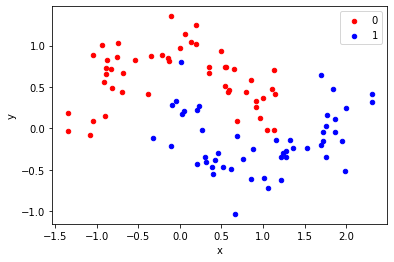

In [ ]:
# generate two moons dataset
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [ ]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [ ]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(trainX, trainy, epochs=4000, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.914


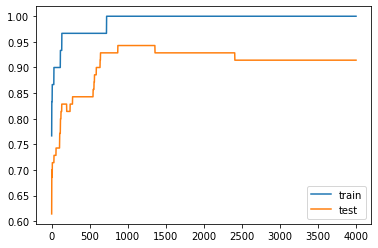

In [ ]:
# overfit mlp for the moons dataset plotting history
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# plot history
# summarize history for accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

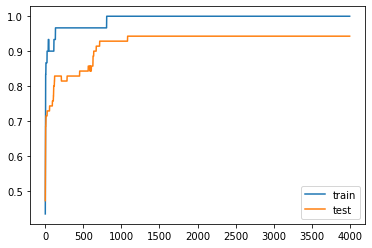

In [9]:
# mlp with weight regularization for the moons dataset plotting history
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)
# plot history
# summarize history for accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Param: 0.100000, Train: 0.967, Test: 0.829
Param: 0.010000, Train: 1.000, Test: 0.929
Param: 0.001000, Train: 1.000, Test: 0.943
Param: 0.000100, Train: 1.000, Test: 0.929
Param: 0.000010, Train: 1.000, Test: 0.914
Param: 0.000001, Train: 1.000, Test: 0.914


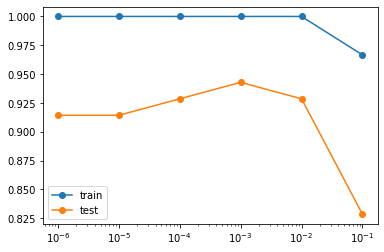

In [10]:
# grid search regularization values for moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
for param in values:
	# define model
	model = Sequential()
	model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer=l2(param)))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=4000, verbose=0)
	# evaluate the model
	_, train_acc = model.evaluate(trainX, trainy, verbose=0)
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
	all_train.append(train_acc)
	all_test.append(test_acc)
# plot train and test means
pyplot.semilogx(values, all_train, label='train', marker='o')
pyplot.semilogx(values, all_test, label='test', marker='o')
pyplot.legend()
pyplot.show()